## Вопросы:
1. в 3м условии "эксперементально определить количество нейронов". Это имееться ввиду просто "методом тыка"?
2. ВПР - это бинарная точность? (validation accurancy)
3. Как построить график ВПР от количества нейронов? Нам нужна система регулирования нейронов?
4. Как взаимодействовать с моделью? После обучения мы можем получить только график потерь. Где куда вводить данные измерений? На этом заканчиваються все уроки (в том числе и kaggle)

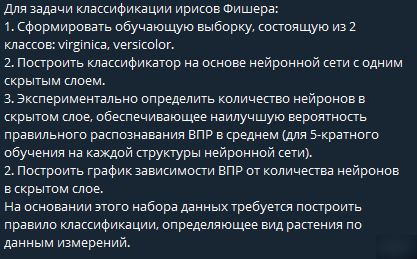

сделать график по последнему пункту :3

# Init

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=columns)


dataset.drop(dataset[dataset[columns[4]] == "Iris-setosa"].index, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

X = dataset.copy()
y = X.pop('class')

y = y.map(
        {'Iris-versicolor':0, 'Iris-virginica': 1}
    )

transformer_num = make_pipeline(
    StandardScaler(),
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)


X_train = transformer_num.fit_transform(X_train)
X_valid = transformer_num.transform(X_valid)

dtype('int64')

# _TMP


In [ ]:
from tensorflow import keras
from keras import layers
from tensorflow import metrics


model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(units=2, activation='relu', input_shape=[X_train.shape[1]],name='hiden'),
    layers.Dense(units=1,activation='sigmoid'),
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        keras.metrics.BinaryAccuracy()
        ]
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid), #validation_split=0.1,
    epochs=1000,
    callbacks=[early_stopping],
)

Epoch 1/1000
3/3 [==============================] - 1s 107ms/step - loss: 0.8606 - binary_accuracy: 0.3200 - val_loss: 0.8788 - val_binary_accuracy: 0.2400
Epoch 2/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.8582 - binary_accuracy: 0.3200 - val_loss: 0.8731 - val_binary_accuracy: 0.2400
Epoch 3/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8503 - binary_accuracy: 0.3067 - val_loss: 0.8679 - val_binary_accuracy: 0.2400
Epoch 4/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8555 - binary_accuracy: 0.3200 - val_loss: 0.8618 - val_binary_accuracy: 0.2400
Epoch 5/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.8506 - binary_accuracy: 0.2933 - val_loss: 0.8567 - val_binary_accuracy: 0.3200
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.8426 - binary_accuracy: 0.2933 - val_loss: 0.8510 - val_binary_accuracy: 0.3200
Epoch 7/1000
3/3 [==============================] - 0s 29ms/step - lo

Best Validation Loss: 0.0933
Best Validation Accuracy: 1.0000


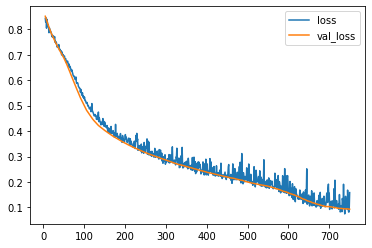

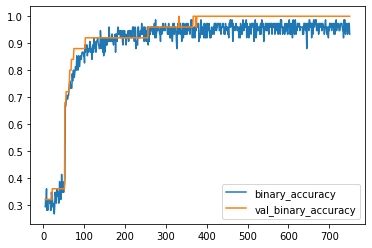

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [ ]:
eva = model.evaluate(X_valid, y_valid, verbose=0)

print(("Validation test Loss: {:0.4f}" +\
      "\nValidation test Accuracy: {:0.4f}")\
      .format(eva[0],eva[1]))



Validation test Loss: 0.0942
Validation test Accuracy: 1.0000


In [ ]:
import numpy as np

def CreateNetworks():
  data = []
  for i in 1,2,3,4: 
    model = keras.Sequential([
      layers.BatchNormalization(),
      layers.Dense(units=i, activation='relu', input_shape=[X_train.shape[1]]),
      layers.Dense(units=1,activation='sigmoid')
    ])

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=[keras.metrics.BinaryAccuracy()]
    )
    
    data.append([i , Train(model)])
  return pd.DataFrame(data, columns=["neurons","accuracy"])

def Train(model):
  early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
  )

  results = []

  for i in 1,2,3,4,5:
    history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      epochs=1000,
      callbacks=[early_stopping],
      verbose=0,
    )

    history_df = pd.DataFrame(history.history)
    results.append(history_df['val_binary_accuracy'].max())

  return np.mean(results)

result_df = CreateNetworks()
result_df.head()

,neurons,accuracy
0,1,0.968
1,2,1.000
2,3,0.952
3,4,0.920


<ipython-input-181-91fe8a1d585a>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(result_df['accuracy'])


<StemContainer object of 3 artists>

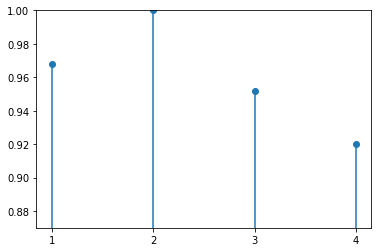

In [ ]:
import matplotlib.pyplot as plt
my_range=range(0,len(result_df.index)+1)

plt.xticks( my_range, result_df['neurons'])
plt.ylim( np.min(result_df['accuracy'])-0.05 )

plt.stem(result_df['accuracy'])